In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
headers = pd.read_csv('../data/S_AB.dat', delim_whitespace=True, nrows=0).columns[1:]
results = pd.read_csv('../data/S_AB.dat', delim_whitespace=True, header=None, skiprows=1, names=headers)

display(results)

,ImpactParameter,S_AB,Stderr(S_AB)
0,0.0,0.922960,0.000013
1,0.1,0.923016,0.000011
2,0.2,0.923294,0.000016
3,0.3,0.923710,0.000015
4,0.4,0.924303,0.000017
...,...,...,...
195,19.5,1.000000,0.000000
196,19.6,1.000000,0.000000
197,19.7,1.000000,0.000000
198,19.8,1.000000,0.000000


In [24]:
b = np.array(results['ImpactParameter'])
S_AB = np.array(results['S_AB'])
S_AB_stderr = np.array(results['Stderr(S_AB)'])

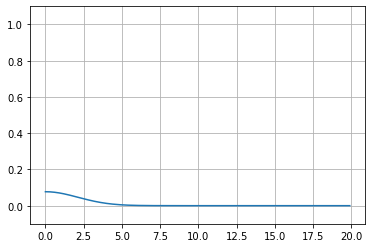

In [25]:
fig, ax = plt.subplots()

ax.plot(b, (1 - S_AB))

ax.grid()
ax.set_ylim(-0.1, 1.1)

plt.show()

In [26]:
10 * np.sqrt(np.sum(np.convolve((b * S_AB_stderr) ** 2, np.ones(2) / 2, mode='valid') * np.convolve(b, np.array([1, -1]), mode='valid') / 2))

0.0004697061146204567

In [27]:
sigma_tot = 10 * 4 * np.pi * np.sum(np.convolve((1 - S_AB) * b, np.ones(2) / 2, mode='valid') * np.convolve(b, np.array([1, -1]), mode='valid'))

print(sigma_tot, "mb")

42.991071889292925 mb


In [28]:
sigma_el = 10 * 2 * np.pi * np.sum(np.convolve((1 - S_AB) ** 2 * b, np.ones(2) / 2, mode='valid') * np.convolve(b, np.array([1, -1]), mode='valid'))

print(sigma_el, "mb")

0.8280273359948874 mb


In [29]:
sigma_reac = 10 * 2 * np.pi * np.sum(np.convolve((1 - S_AB ** 2) * b, np.ones(2) / 2, mode='valid') * np.convolve(b, np.array([1, -1]), mode='valid'))

print(sigma_reac, "mb")

42.163044553298036 mb


In [ ]:
beta       = np.array([0.2    , 0.35    , 1        , 0.1])
sigma_reac = np.array([953.689, 984.5625, 1105.5687, 931.10560])